In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/ryanjsfx/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [7]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI):
        self.problem_type = problem_type
        self.dt = dt
        
        self.init_constants()
        self.init_arrays()
        self.set_initial_conditions(posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI)

        self.simulate()
        self.clean_data()
        self.plot_results(self.posz, self.velz, self.accz)

    def init_constants(self):
        self.NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
        self.gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        self.time = np.zeros(NT)
        self.posx = np.zeros(NT)
        self.posy = np.zeros(NT)
        self.posz = np.zeros(NT)

        self.velx = np.zeros(NT)
        self.vely = np.zeros(NT)
        self.velz = np.zeros(NT)

        self.accx = np.zeros(NT)
        self.accy = np.zeros(NT)
        self.accz = np.zeros(NT)

    def set_initial_conditions(self, posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI):
        self.posx[0] = posxI
        self.posy[0] = posyI
        self.posz[0] = poszI

        self.velx[0] = velxI
        self.vely[0] = velyI
        self.velz[0] = velzI

        self.accx[0] = accxI
        self.accy[0] = accyI
        self.accz[0] = acczI

    def update_time(self, index):
        self.time[index] = self.time[index-1] + self.dt
    
    def update_posx(self):
        pass

    def update_posy(self):
        pass

    def update_posz(self):
        if problem_type == "EarthSurfaceProblem":
            return self.posz[0] + self.velz[0]*self.time + 0.5 * self.gravEarth * self.time**2

    def update_velx(self):
        pass

    def update_vely(self):
        pass

    def update_velz(self):
        if problem_type == "EarthSurfaceProblem":
            return self.velz[0] + self.gravEarth * self.time

    def update_accx(self):
        pass

    def update_accy(self):
        pass

    def update_accz(self):
        if problem_type == "EarthSurfaceProblem":
            return self.accz[0]
            
    def simulate(self):
        for index in range(1,NT):
            print("index: ", index)
            self.update_time(index)
            self.update_posx()
            self.update_posy()
            self.update_posz()

            self.update_velx()
            self.update_vely()
            self.update_velz()

            self.update_accx()
            self.update_accy()
            self.update_accz()

            print("index: ", index)
            print("self.time[index]: ", self.time[index])            
            print("self.posz[index]: ", self.velz)
            print("self.velz: ", self.velz)
            input(">>")
            
            if self.problem_type == "EarthSurfaceProblem" and self.posz[index] <= 0:
                break

        # put for loop and/or while loop here, call update functions (and update time!)

    def clean_data(self):
        indices = np.where(self.time > 0)[0]

        self.time = np.append(self.time[0], self.time[indices])
        
        self.posx = np.append(self.posx[0], self.posx[indices])
        self.posy = np.append(self.posy[0], self.posy[indices])
        self.posz = np.append(self.posz[0], self.posz[indices])

        self.velx = np.append(self.velx[0], self.velx[indices])
        self.vely = np.append(self.vely[0], self.vely[indices])
        self.velz = np.append(self.velz[0], self.velz[indices])

        self.accx = np.append(self.accx[0], self.accx[indices])
        self.accy = np.append(self.accy[0], self.accy[indices])
        self.accz = np.append(self.accz[0], self.accz[indices])

    def plot_results(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for index in range(len(yvalues)):
            axs[index].plot(self.time, yvalues[index])
            axs[index].set_ylabel(ylabels[index])

        # axs[0].plot(times, posz)
        # axs[1].plot(times, velz)
        # axs[2].plot(times, accz)

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()

In [8]:
dt = 0.1
problem_type = "EarthSurfaceProblem"
NT = 100
posxI = 0
posyI = 0
poszI = 15 # meters
velxI = 0
velyI = 0
velzI = 0
accxI = 0
accyI = 0
acczI = 9.8

index:  1


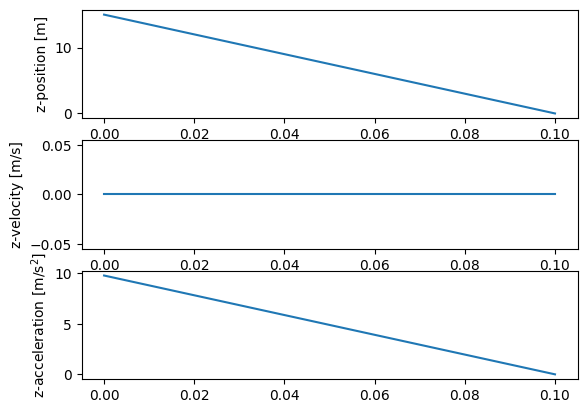

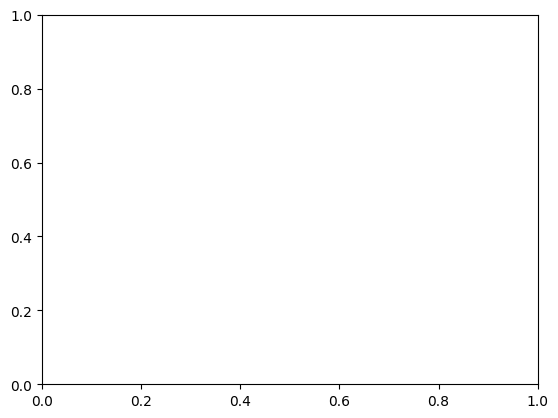

In [9]:
gravitySolverObject = GravitySolver(dt, problem_type, NT, posxI, posyI, poszI, velxI, velyI, velzI, accxI, accyI, acczI)
#gravitySolverObject.the_plot.savefig("dropped_ball_v2.png")
#gravitySolverObject.the_plot.close()